# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
food = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
food.shape

(1898, 9)

#### Observations:
* The shape of the 'food' DataFrame is (1898, 9), indicating that it has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

 It has 1898 entries and 9 columns. Here is a summary of the columns:

1. **order_id**: Integer, non-null, unique identifier for each order.
2. **customer_id**: Integer, non-null, unique identifier for each customer.
3. **restaurant_name**: Object (string), non-null, name of the restaurant.
4. **cuisine_type**: Object (string), non-null, type of cuisine.
5. **cost_of_the_order** : Float, non-null, cost of the order.
6. **day_of_the_week**  : Object (string), non-null, day of the week when the order was placed.
7.  **rating**  : Object (string), non-null, rating information.
8. **food_preparation_time**: Integer, non-null, time taken for food preparation.
delivery_time: Integer, non-null, delivery time.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
food.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
 *  The output of food.isnull().sum() indicates that there are no missing
values in any of the columns of the 'food' DataFrame. Each column has 0 missing values.

If there were missing values, you might consider treating them using appropriate methods, such as filling missing values with a specific value, imputing them based on other data, or dropping rows or columns with missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
food.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


**Order ID:**
* The order IDs range from approximately 1,476,547 to 1,478,444.
The mean order ID is around 1,477,496.
The order IDs show a relatively uniform distribution.

**Customer ID:**
* Customer IDs range from 1,311 to 405,334.
The mean customer ID is approximately 171,168.5.
There is a notable standard deviation, indicating a wide spread in customer IDs.

**Cost of the Order:**
* The cost of orders varies between 4.47 and 35.41 dollars.
The mean cost of the order is approximately 16.50 dollars.
Most orders fall within the range of 12.08 to 22.30 dollars.

**Food Preparation Time:**
* Food preparation time ranges from 20 to 35 minutes .
  The mean preparation time is approximately 27.37 minutes .
The distribution appears to be relatively evenly spread across the range.

**Delivery Time:**
*  Delivery time ranges from 15 to 33 minutes.
The mean delivery time is approximately 24.16 minutes.
Most delivery times fall within the range of 20 to 28 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
food[food['rating']=="Not given"].shape[0]

736

#### Observations:
* There are 736 orders in the 'food' DataFrame where the 'rating' column has the value "Not given." This means that in these 736 instances, the rating information is not provided or marked as "Not given."


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

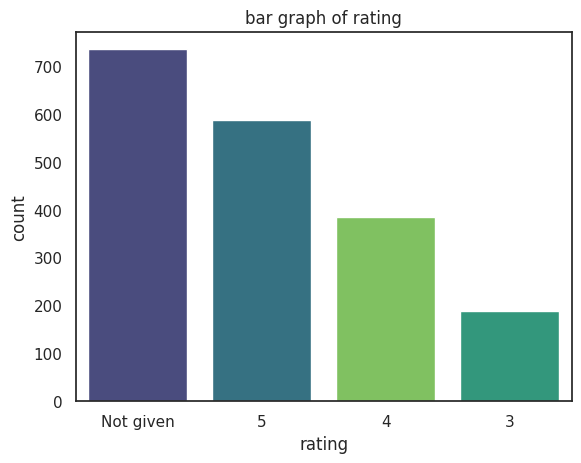

In [ ]:
plt.title("bar graph of rating")
sns.countplot(data=food,x="rating",hue="rating",order=food["rating"].value_counts().index,palette="viridis",legend=False);

## Observations:
*   The distribution of observations for the 'rating' variable in the dataset is diverse, with a significant number of occurrences marked as 'Not given' (736), followed by ratings of 5 (588), 4 (386), and 3 (188). This suggests variability in the available rating information, including a substantial portion where the rating is not provided.

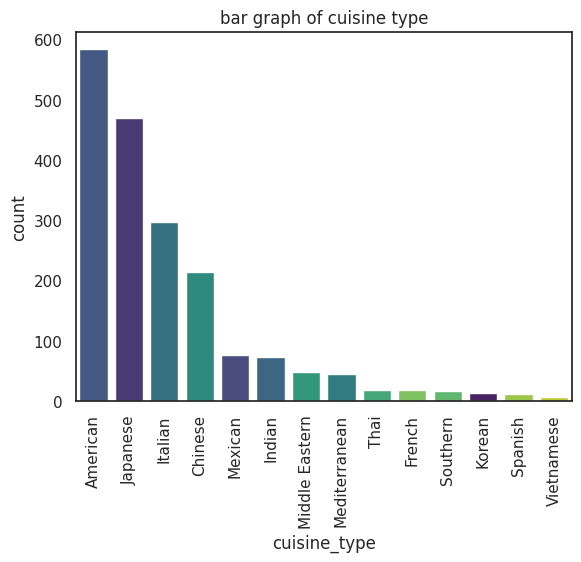

In [ ]:
plt.title("bar graph of cuisine type")
sns.countplot(data=food,x="cuisine_type",hue="cuisine_type",order=food["cuisine_type"].value_counts().index,palette='viridis',legend=False)
plt.xticks(rotation =90)
plt.show()

## Observations:
*  The distribution of observations by cuisine type in the dataset is diverse, with American and Japanese cuisines having the highest frequencies at 584 and 470 observations, respectively. Other notable cuisines include Italian (298), Chinese (215), and Mexican (77), while less frequently represented cuisines include Vietnamese (7), Spanish (12), and Korean (13). This suggests a varied dataset with a range of culinary preferences, with American and Japanese cuisines being the most prevalent.

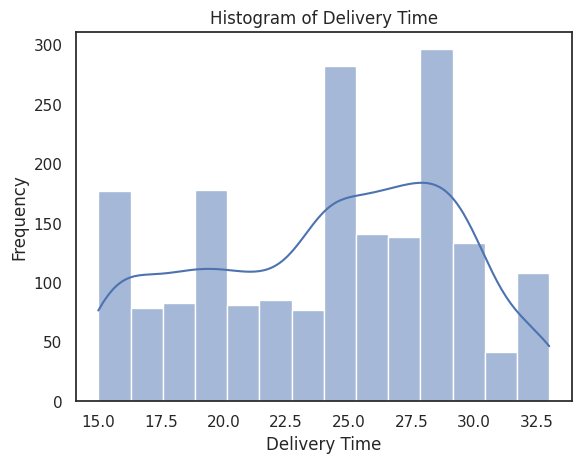

In [ ]:
plt.title('Histogram of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
sns.histplot(food['delivery_time'], kde=True);

## Observations:
*  The left-skewed histogram suggests that there are fewer observations with extremely low values (left tail) compared to the right side.
*   The mode (peak) of the distribution is likely to be closer to the right side.Delivery time ranges from 15 to 33 minutes.

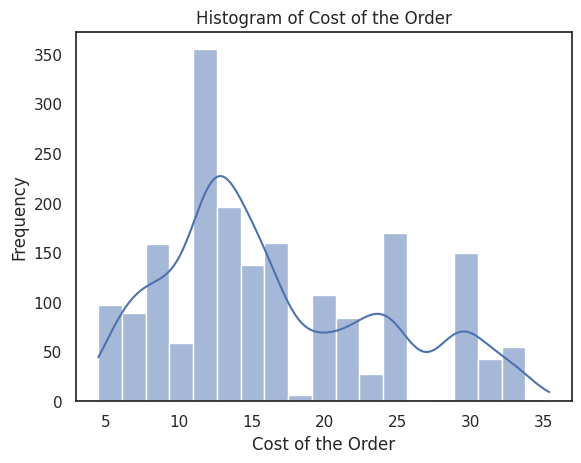

In [ ]:
plt.title('Histogram of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')

sns.histplot(food['cost_of_the_order'], kde=True);

## Observations:
*  The right skewness indicates that there are relatively fewer observations with higher costs, but there are instances of costly orders that contribute to the extended tail on the right side of the plot.Most orders fall within the range of 12.08 to 22.30 dollars.



low priced    1008
mid price      790
costly         100
Name: cost_bins, dtype: int64


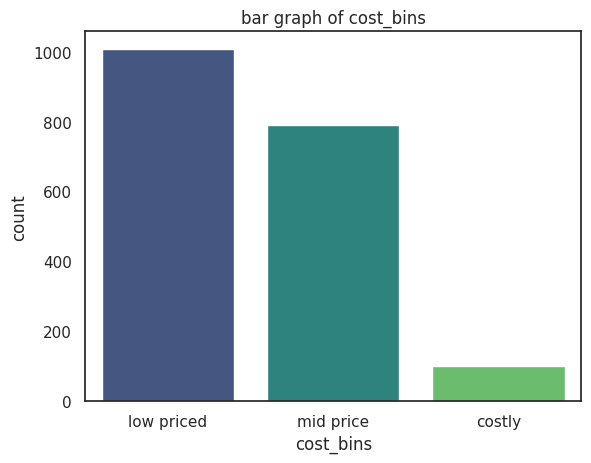

In [ ]:
plt.title("bar graph of cost_bins")
food["cost_bins"]= pd.cut(food["cost_of_the_order"],bins=[4,15,30,40],labels=["low priced","mid price","costly"],right=False)
cost_bins = food['cost_bins'].value_counts()
print(cost_bins)
sns.countplot(data=food,x="cost_bins",hue="cost_bins",palette='viridis',legend=False);

## Observations:
*   The majority of observations fall into the "low priced" category, suggesting a significant portion of orders in the dataset have relatively lower costs.

*   The "mid price" category has a substantial number of observations, indicating a moderate frequency of orders  with intermediate costs.

*  The "costly" category represents a smaller subset of observations, indicating fewer orders  with higher costs.

* Low Priced: 1008 occurrences,
Mid Price: 790 occurrences,
Costly: 100 occurrences,

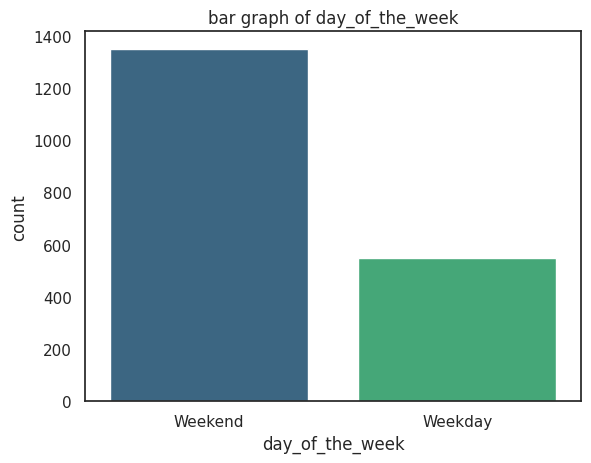

In [ ]:
plt.title("bar graph of day_of_the_week")
sns.countplot(data=food,x="day_of_the_week", hue="day_of_the_week",palette='viridis',legend=False);

## Observations:
*  **Weekend Orders**: There are 1351 orders recorded during the weekends. This suggests a relatively higher volume of orders on weekends compared to weekdays.
*  **Weekday Orders**: On weekdays, there are 547 recorded orders. While this count is lower than that of weekends, it still represents a significant portion of the overall order volume.

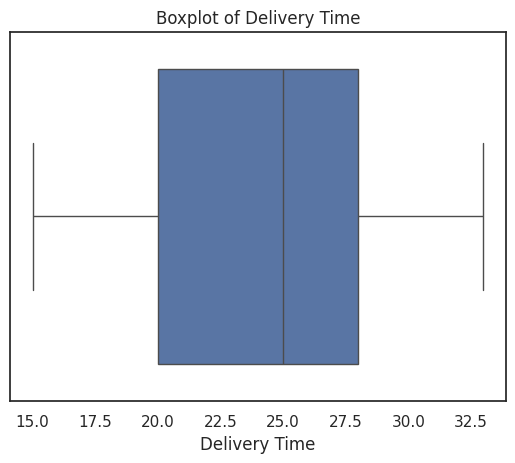

In [ ]:
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')
sns.boxplot(data=food,x='delivery_time');

## Observations:
* The left-skewness indicates that the left tail of the distribution is longer or stretched compared to the right tail.The majority of the data points are concentrated on the right side, and there are fewer but more extreme values on the left side. Most delivery times fall within the range of 20 to 28 minutes

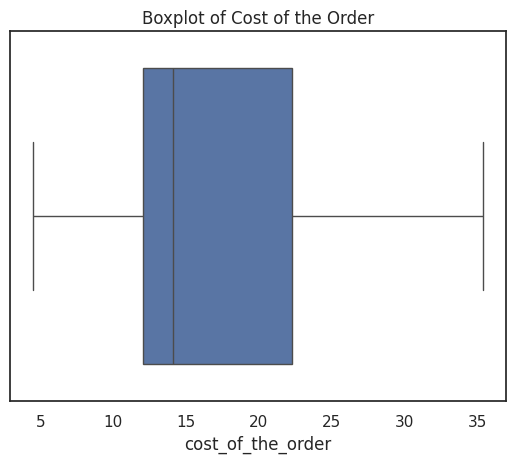

In [ ]:
plt.title('Boxplot of Cost of the Order')
sns.boxplot(data=food,x='cost_of_the_order');

## Observations:
* The right whisker (upper whisker) is longer than the left whisker (lower whisker), extending towards higher values.The cost of orders varies between 4.47 and 35 dollars.

* The mean is likely to be greater than the median due to the influence of the right-skewed tail.

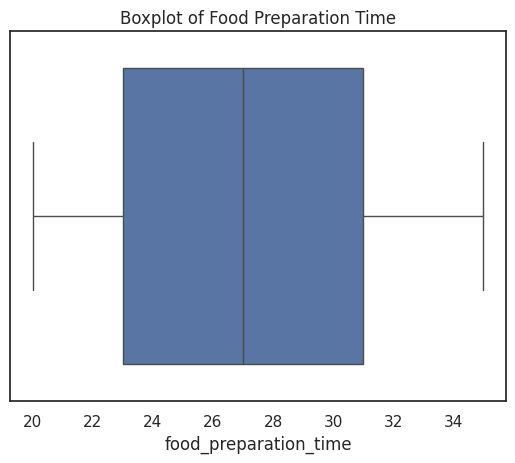

In [ ]:
plt.title('Boxplot of Food Preparation Time')
sns.boxplot(data=food,x='food_preparation_time');

## Observations:
*  The boxplot displays a symmetrical shape, indicating that the data is evenly distributed on both sides of the median. The left and right sides of the box are approximately equal in length The average preparation time is approximately 27 minutes

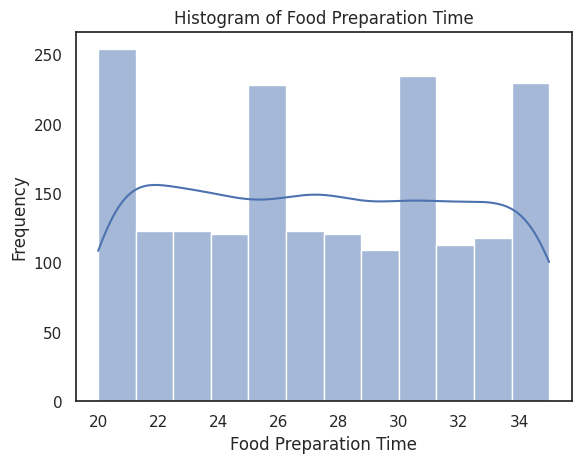

In [ ]:
plt.title('Histogram of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
sns.histplot(data=food,x="food_preparation_time",kde=True);

## Observations:
*  The distribution appears to be relatively evenly spread across the range.Food preparation time ranges from 20 to 35 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
top_five =food["restaurant_name"].value_counts().sort_values(ascending=False).head()
top_five

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

*  Shake Shack is the most popular restaurant, receiving the highest number of orders among the listed restaurants.
*    The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm follow as the next most ordered restaurants.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
food_weekend = food[food["day_of_the_week"]=="Weekend"]
food_weekend["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

 *   American cuisine has the highest number of orders on weekends, making it the most popular cuisine during that time.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
round((food["cost_of_the_order"]>20).mean()*100,2)

29.24

#### Observations:
 * In the 'food' DataFrame where the cost of the order is greater than 20
dollars. The result, approximately 29.24%, indicates that around 29.24% of the orders have a cost exceeding 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
average_delivery_time = round(food['delivery_time'].mean(),2)
average_delivery_time

24.16

#### Observations:

* The delivery time for orders is around 24.16 minutes.The average delivery time provides a central measure of the typical time it takes for orders to be delivered.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
food["customer_id"].value_counts().sort_values(ascending=False).head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:

*  Customer ID 52832 has the highest number of orders, with a count of 13.
*  There are several customers with relatively high order counts, suggesting repeat orders from these customers.Additionally, there are multiple observations with the value 7.
*  The company has decided to reward these top 5 most frequent customers with 20% discount vouchers.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


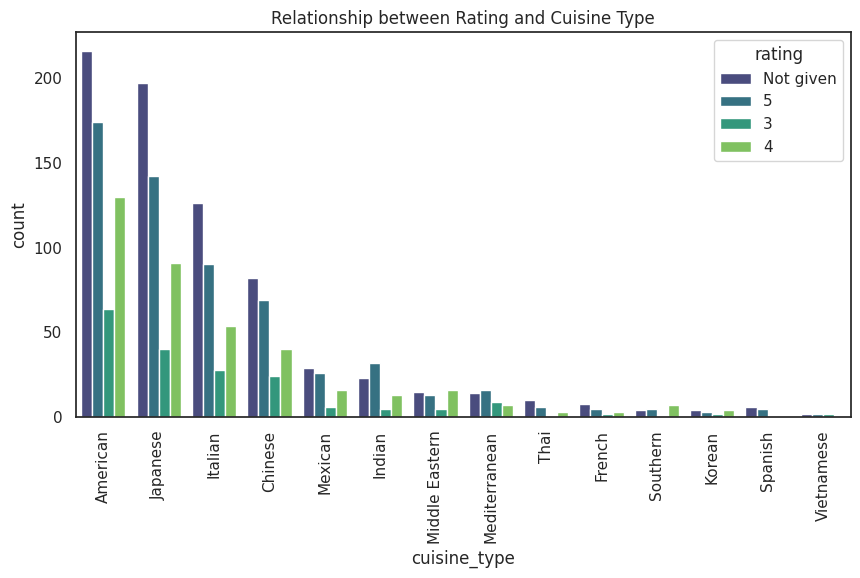

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Relationship between Rating and Cuisine Type')
sns.countplot(data=food,x="cuisine_type",order=food["cuisine_type"].value_counts().index,hue="rating",palette="viridis",)
plt.xticks(rotation =90)
plt.show()

## Observations:
*   The majority of American cuisine orders have a rating of "Not given" (216 occurrences).
There are 174 orders with a rating of 5, 130 with a rating of 4, and 64 with a rating of 3.

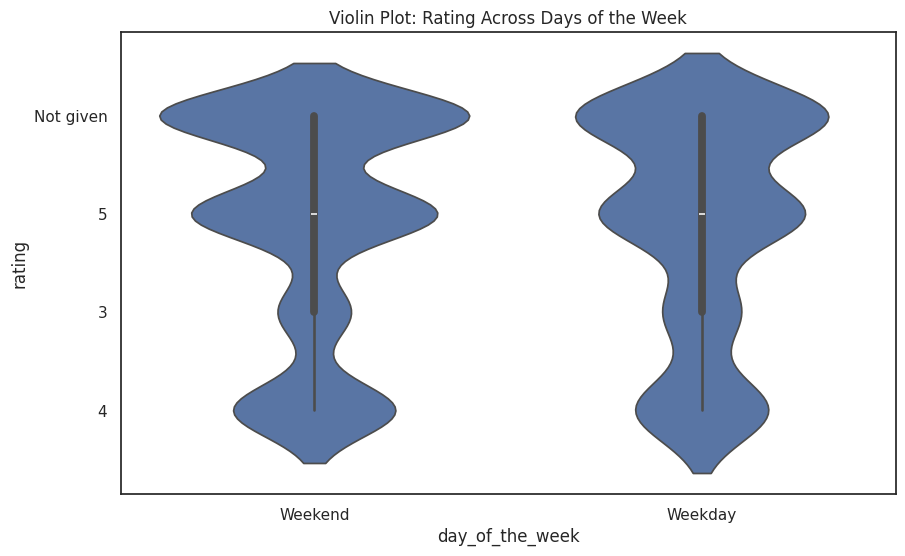

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_the_week', y='rating', data=food)
plt.title("Violin Plot: Rating Across Days of the Week")
plt.show()

# Observation
* There are two categories for the day of the week: 'Weekend' and 'Weekday.
* The 'Not given' category for ratings is the most frequent.  

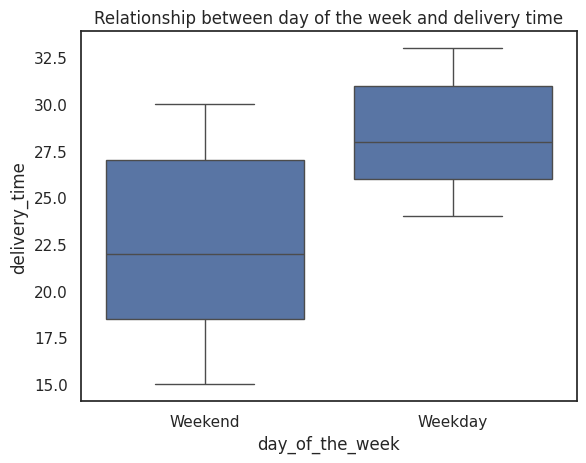

In [ ]:
plt.title('Relationship between day of the week and delivery time')
sns.boxplot(data=food,x="day_of_the_week",y="delivery_time");


# Observation:

*   **Weekday vs. Weekend Delivery Time**:
On average, the delivery time (delivery_timer) is higher during weekdays (Monday to Friday) at approximately 28.34 minutes compared to weekends, where the average delivery time is around 22.47 minutes.

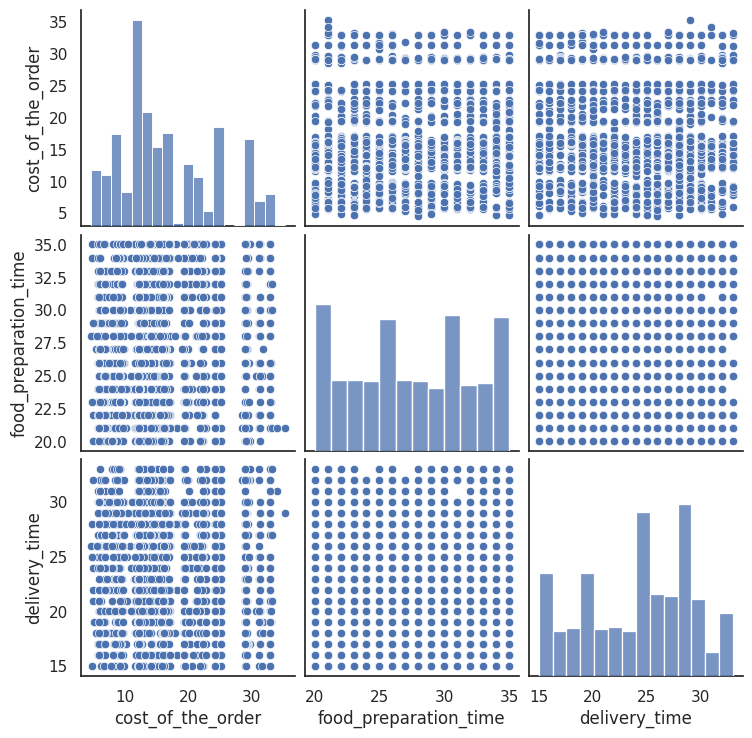

In [ ]:
sns.pairplot(data=food[["cost_of_the_order","food_preparation_time","delivery_time"]]);

# Observations:
* There is no direct information on linear correlation.

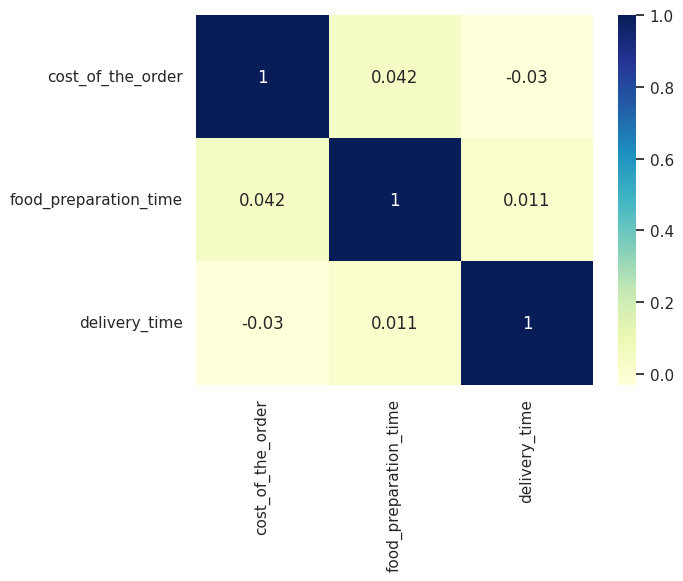

In [ ]:
sns.heatmap(data=food[["cost_of_the_order","food_preparation_time","delivery_time"]].corr(),annot=True,cmap="YlGnBu");

# Observations:

*  The correlation between the cost of the order and both food preparation time and delivery time is relatively weak. The correlation coefficients are 0.0415 and -0.0299, respectively.
This suggests that there is no strong linear relationship between the cost of the order and the time-related variables.


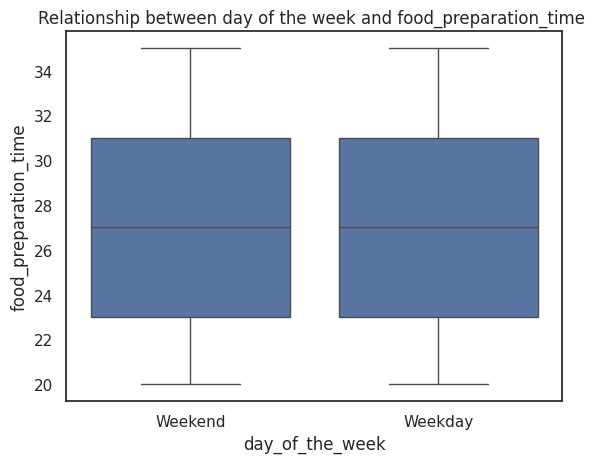

In [ ]:
plt.title('Relationship between day of the week and food_preparation_time ')
sns.boxplot(data=food,x="day_of_the_week",y="food_preparation_time");

# Observation:

* The 'day_of_the_week' column has two unique values: 'Weekend' and 'Weekday'.
* The 'food_preparation_time' column has a mean of approximately 27.37.

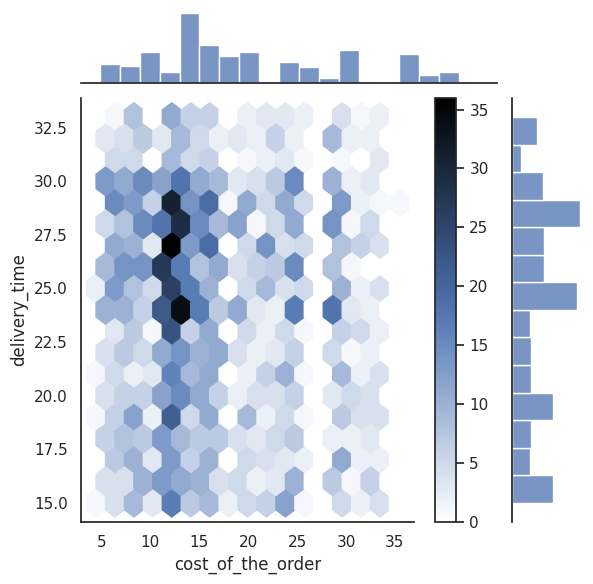

In [ ]:
sns.jointplot(data=food,x="cost_of_the_order",y="delivery_time",kind="hex");
plt.colorbar();

# Observation:



* Cost of the order between USD 11 to  USD 15, there is a consistent delivery_time pattern. Most frequently, the delivery time falls within the range of 23 to 29 minutes.


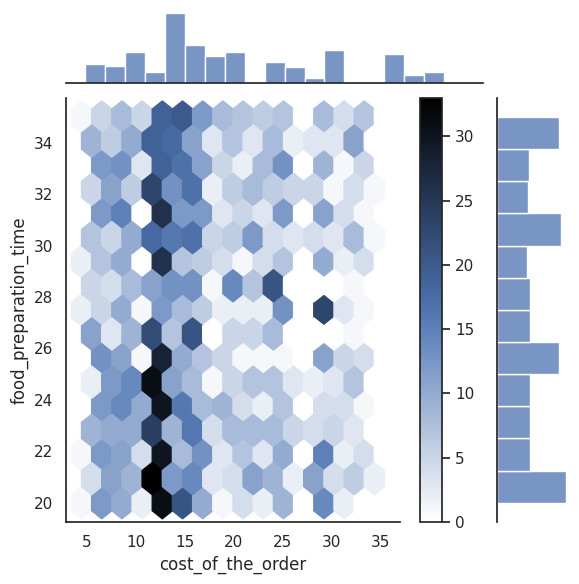

In [ ]:
sns.jointplot(data=food,x="cost_of_the_order",y="food_preparation_time",kind="hex");
plt.colorbar();

# Observation



* For orders with cost of the order between 10 to 15, the food preparation time tends to be around 27 minutes on average.

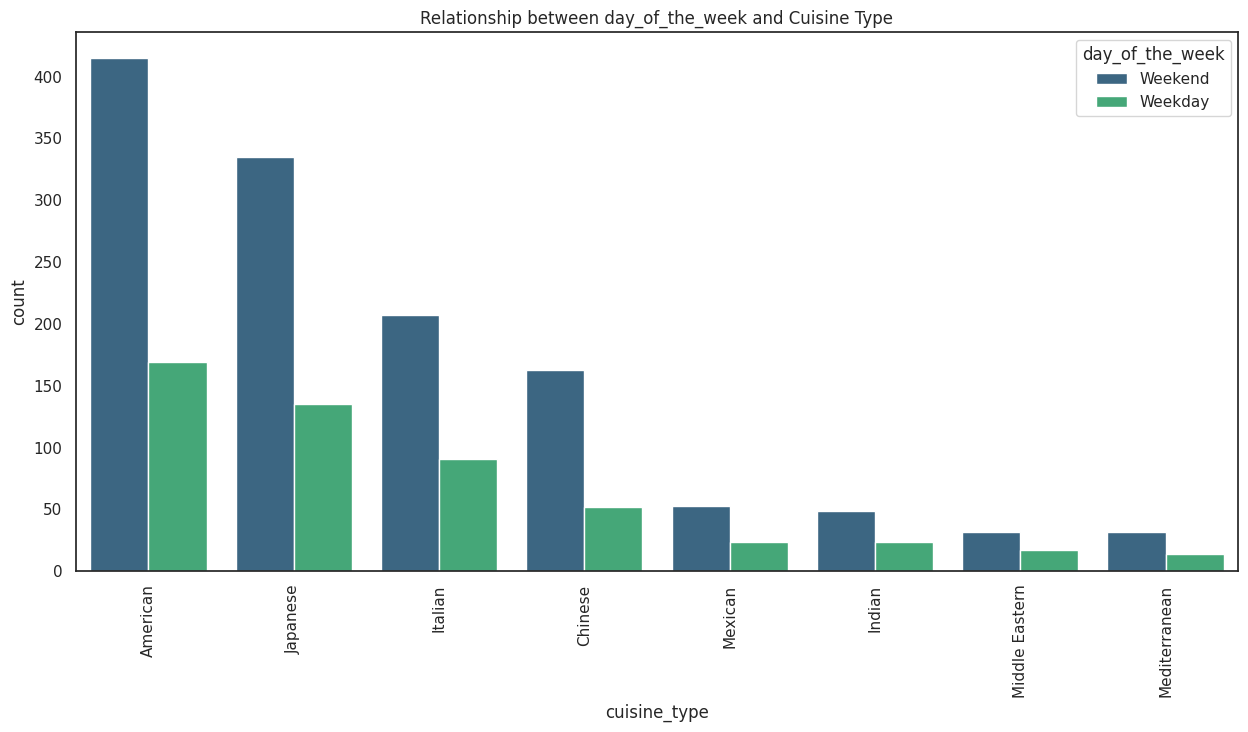

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Relationship between day_of_the_week and Cuisine Type')
plt.xticks(rotation =90)
sns.countplot(data = food, x = 'cuisine_type', hue = 'day_of_the_week', order = food["cuisine_type"].value_counts().iloc[:8].index,palette="viridis")
plt.show()

# Observation:

*   There are two unique values for the day_of_the_week: 'Weekend' and 'Weekday.'
*  The most frequent cuisine type is 'American' (584 times).

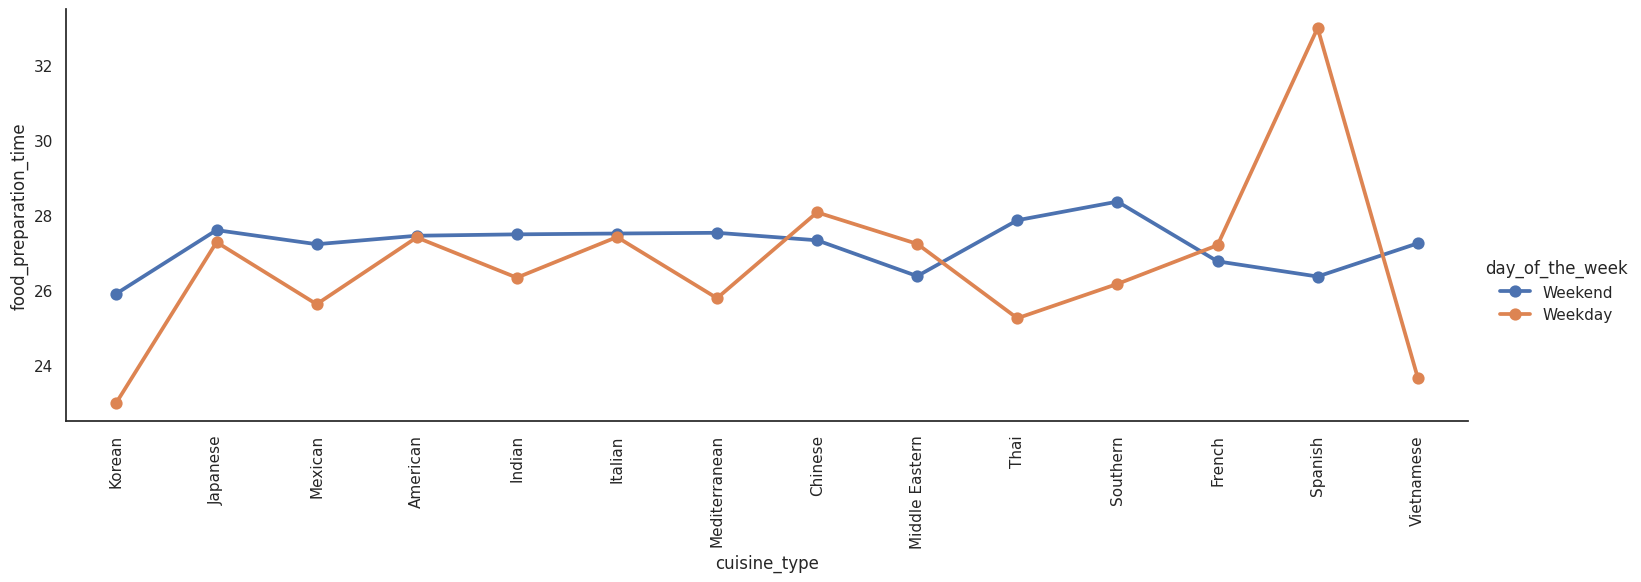

In [ ]:
sns.catplot(data=food,x="cuisine_type",y="food_preparation_time",errorbar=None,estimator=np.mean,kind="point",height=5,aspect=3,hue="day_of_the_week")
plt.xticks(rotation =90)
plt.show()


# Observation:  
* The distribution is spread across different points, indicating a variation in food preparation times.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rating_given=food[food["rating"]!="Not given"].copy()
rating_given
rating_given["rating"]=rating_given["rating"].astype(dtype="float",errors="ignore")
restaurant_stats = rating_given.groupby('restaurant_name')['rating'].agg(['count', 'mean'])


eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]


print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi

* Shake Shack


*  The Meatball Shop

  These four restaurants meet the specified conditions and are eligible for the promotional offer.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
net_revenue=0
for cost in food["cost_of_the_order"]:
  if cost>20:
    net_revenue +=0.25*cost
  elif cost>5:
    net_revenue += 0.15 * cost
  else:
    net_revenue += 0*cost

print(f"Net Revenue:${net_revenue:.2f}")

Net Revenue:$6166.30


#### Observations:

* The net revenue of the company is $6166.30. It provides an overview of how much revenue the company retains from orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
food["total time"]=food["delivery_time"]+food["food_preparation_time"]
food["total time"]
percentage_orders_exceeding_60=round((food["total time"]>60).mean()*100,2)
percentage_orders_exceeding_60

10.54

#### Observations:

*  About 10.54% of orders are experiencing longer delivery times, which could be a concern for customer satisfaction.
  
* The company may want to investigate and address the factors contributing to extended delivery times, such as optimizing food preparation processes or improving delivery logistics.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
food.groupby(["day_of_the_week"])["delivery_time"].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
 *  The average delivery time in minutes for orders on weekdays is approximately 28.34, while for weekend orders, it is approximately 22.47. This suggests that, on average, orders placed during weekdays tend to have a longer delivery time compared to those placed on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   The dataset contains a total of 1,898 orders with unique order IDs and customer IDs.
*   There are 178 unique restaurant names and 14 unique cuisine types.
*    Most orders have American cuisine, and the most frequent restaurant is "Shake Shack" with 219 orders.


*    Ratings are missing ("Not given") for 736 orders.

2. **Pricing and Timing:**




* The average cost of an order is approximately USD 16.50, with a range from USD 4.47 to USD 35.41.  

* Food preparation times range from 20 to 35 minutes, with an average of approximately 27.37 minutes.  
*  Delivery times range from 15 to 33 minutes, with an average of approximately 24.16 minutes.

3. **Day of the Week:**
*  Most orders are placed on weekends, accounting for 1,351 orders.

4. **Cost Bins:**

* The majority of orders fall into the "low priced" (USD 4 to USD 15 ) category (1,008 orders), indicating a preference for lower-cost items.

### Recommendations:
1. **Feedback Collection**:
*  Implement strategies to encourage customers to provide feedback ratings for a more comprehensive analysis.
* Offer incentives or discounts for customers who share their feedback.  
2. **Diversify Menu:**


* Explore opportunities to diversify the menu further with a focus on American cuisine.  
* Consider introducing new items or variations to meet diverse customer preferences.  
3. **Promotional Offers:**


* Leverage customer feedback ratings to identify popular items and promote them through special offers.   
*  Design promotional campaigns around highly-rated items to attract more orders.

4.  **Optimize Delivery Times:**



* Analyze the food preparation and delivery times to identify areas for optimization.  
* Aim to improve overall delivery efficiency to meet or exceed customer expectations.  

5.    **Cuisine-Specific Strategies:**


*  Tailor marketing strategies based on the popularity of different cuisines.
*  Consider running cuisine-specific promotions to attract customers with varied tastes.

6.   **Customer Engagement:**
   

*   Engage with customers through surveys or promotions to gather insights
     into preferences.
*   Use feedback to continuously enhance the overall customer experience.


 7.  **Quality Control:**



*  Ensure consistent quality across all cuisines and items to maintain customer satisfaction.
*  Monitor customer reviews and address any quality-related concerns promptly.

      
 8.      **Weekday vs. Weekend Strategies:**
    

*   Consider offering promotions or discounts during specific weekdays or weekends to boost sales during less busy periods.
*   Analyze customer behavior to tailor marketing efforts to peak order times.

By implementing these recommendations, the business can enhance customer satisfaction, attract a broader customer base, and optimize operational efficiency. Continuous monitoring and adaptation based on customer feedback will contribute to the long-term success of the business.




---